In [186]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [188]:
data = pd.read_csv("../Auditorium-Exercises/data/credit_card_approval.csv")

In [190]:
data.head(50)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Higher education,Married,House / apartment,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
3,5009749,F,Y,N,0,NaN,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
5,5009754,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,1,1,1,0,2,1
6,5009894,F,N,N,0,180000.0,Secondary / secondary special,Married,House / apartment,365243,1,0,0,0,2,1
7,5010864,M,Y,Y,1,450000.0,Secondary / secondary special,Married,House / apartment,-678,1,0,1,1,3,1
8,5010868,M,Y,Y,1,450000.0,Secondary / secondary special,Married,House / apartment,-678,1,0,1,1,3,1
9,5010869,M,Y,Y,1,450000.0,Secondary / secondary special,Single / not married,House / apartment,-678,1,0,1,1,1,1


<Axes: xlabel='label'>

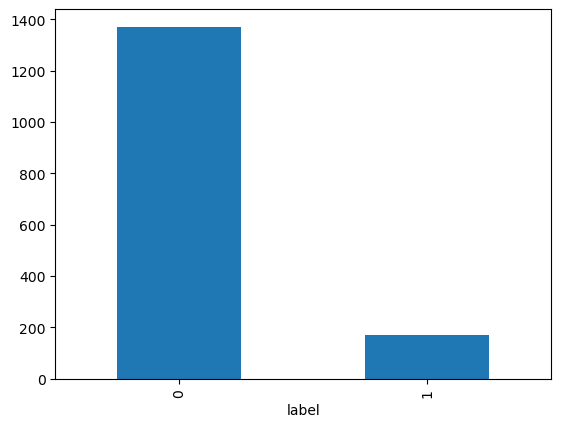

In [192]:
data['label'].value_counts().plot.bar()

In [193]:
data['Employed_days'].describe()

count      1541.000000
mean      59405.890980
std      137847.216798
min      -14887.000000
25%       -3173.000000
50%       -1563.000000
75%        -431.000000
max      365243.000000
Name: Employed_days, dtype: float64

In [196]:
data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
EDUCATION          0
Marital_status     0
Housing_type       0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

In [198]:
data = data[data['Employed_days'] < 365243]

In [200]:
data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     19
EDUCATION          0
Marital_status     0
Housing_type       0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

<Axes: ylabel='Frequency'>

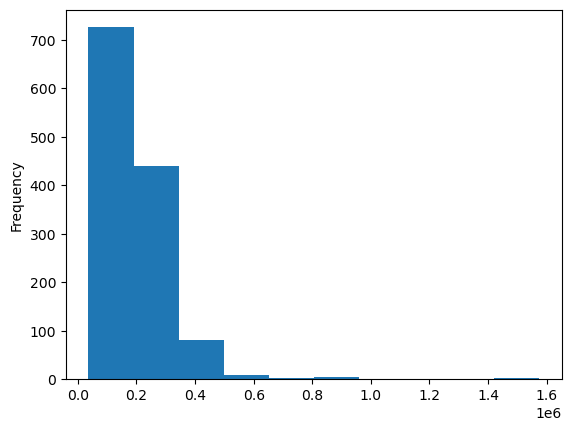

In [202]:
data['Annual_income'].plot.hist()

In [203]:
#data['Annual_income']= data['Annual_income'].fillna(value=data['Annual_income'].median())

In [206]:
imputer = IterativeImputer()
data[['Annual_income', 'Employed_days']] = imputer.fit_transform(data[['Annual_income', 'Employed_days']])

In [208]:
data.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
EDUCATION         0
Marital_status    0
Housing_type      0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [210]:
data['GENDER'].value_counts()

GENDER
F    759
M    522
Name: count, dtype: int64

In [212]:
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])

In [214]:
def encode_boolean(bool_value):
    if bool_value == 'Y':
        return 1
    else:
        return 0

data['Car_Owner'] = data['Car_Owner'].apply(encode_boolean)

In [216]:
data['Propert_Owner'] = data['Propert_Owner'].apply(encode_boolean)

In [218]:
data.head(50)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
1,5009744,0,1,0,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
2,5009746,0,1,0,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
3,5009749,0,1,0,0,198872.679668,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
4,5009752,0,1,0,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
5,5009754,0,1,0,0,315000.000000,Higher education,Married,House / apartment,-586.0,1,1,1,0,2,1
7,5010864,1,1,1,1,450000.000000,Secondary / secondary special,Married,House / apartment,-678.0,1,0,1,1,3,1
8,5010868,1,1,1,1,450000.000000,Secondary / secondary special,Married,House / apartment,-678.0,1,0,1,1,3,1
9,5010869,1,1,1,1,450000.000000,Secondary / secondary special,Single / not married,House / apartment,-678.0,1,0,1,1,1,1
10,5018498,0,1,1,0,90000.000000,Secondary / secondary special,Married,House / apartment,-1002.0,1,1,1,0,2,1
11,5018501,0,1,1,0,198872.169060,Secondary / secondary special,Married,House / apartment,-1002.0,1,1,1,0,2,1


In [220]:
data['EDUCATION'].value_counts()

EDUCATION
Secondary / secondary special    822
Higher education                 378
Incomplete higher                 65
Lower secondary                   14
Academic degree                    2
Name: count, dtype: int64

In [222]:
education_encoding = {
    "Lower secondary": 0,
    "Secondary / secondary special": 1,
    "Incomplete higher": 2,
    "Higher education": 3,
    "Academic degree": 4
}

In [224]:
def encode_education(education):
    return education_encoding[education]

In [226]:
data['EDUCATION'] = data['EDUCATION'].apply(encode_education)

In [228]:
data.head(50)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
1,5009744,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
2,5009746,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
3,5009749,0,1,0,0,198872.679668,3,Married,House / apartment,-586.0,1,1,1,0,2,1
4,5009752,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
5,5009754,0,1,0,0,315000.000000,3,Married,House / apartment,-586.0,1,1,1,0,2,1
7,5010864,1,1,1,1,450000.000000,1,Married,House / apartment,-678.0,1,0,1,1,3,1
8,5010868,1,1,1,1,450000.000000,1,Married,House / apartment,-678.0,1,0,1,1,3,1
9,5010869,1,1,1,1,450000.000000,1,Single / not married,House / apartment,-678.0,1,0,1,1,1,1
10,5018498,0,1,1,0,90000.000000,1,Married,House / apartment,-1002.0,1,1,1,0,2,1
11,5018501,0,1,1,0,198872.169060,1,Married,House / apartment,-1002.0,1,1,1,0,2,1


In [230]:
data['Marital_status'].value_counts()

Marital_status
Married                 892
Single / not married    194
Civil marriage           92
Separated                74
Widow                    29
Name: count, dtype: int64

In [232]:
#enc_data = pd.get_dummies(data[['Marital_status', 'Housing_type']])
#data = pd.concat([data, enc_data], axis=1)

In [234]:
#data = data.drop(columns=['Marital_status', 'Housing_type'])
data = data.drop(columns=['Ind_ID'])

In [236]:
data['Marital_status'] = label_encoder.fit_transform(data['Marital_status'])
data['Housing_type'] = label_encoder.fit_transform(data['Housing_type'])

In [238]:
def encode_true_false(value):
    return 1 if value else 0

In [240]:
data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
1,0,1,0,0,315000.000000,3,1,1,-586.0,1,1,1,0,2,1
2,0,1,0,0,315000.000000,3,1,1,-586.0,1,1,1,0,2,1
3,0,1,0,0,198872.679668,3,1,1,-586.0,1,1,1,0,2,1
4,0,1,0,0,315000.000000,3,1,1,-586.0,1,1,1,0,2,1
5,0,1,0,0,315000.000000,3,1,1,-586.0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0,0,1,0,198870.720702,3,1,1,-2182.0,1,0,0,0,2,0
1537,0,0,0,0,225000.000000,2,3,1,-1209.0,1,0,0,0,1,0
1538,1,1,1,2,180000.000000,3,1,1,-2477.0,1,0,0,0,4,0
1539,1,1,0,0,270000.000000,1,0,1,-645.0,1,1,1,0,2,0


In [242]:
scaler = MinMaxScaler()
data[["Annual_income", "Employed_days" ]] = scaler.fit_transform(data[["Annual_income", "Employed_days" ]])

In [244]:
data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
1,0,1,0,0,0.181287,3,1,1,0.965371,1,1,1,0,2,1
2,0,1,0,0,0.181287,3,1,1,0.965371,1,1,1,0,2,1
3,0,1,0,0,0.105830,3,1,1,0.965371,1,1,1,0,2,1
4,0,1,0,0,0.181287,3,1,1,0.965371,1,1,1,0,2,1
5,0,1,0,0,0.181287,3,1,1,0.965371,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0,0,1,0,0.105829,3,1,1,0.857635,1,0,0,0,2,0
1537,0,0,0,0,0.122807,2,3,1,0.923316,1,0,0,0,1,0
1538,1,1,1,2,0.093567,3,1,1,0.837721,1,0,0,0,4,0
1539,1,1,0,0,0.152047,1,0,1,0.961388,1,1,1,0,2,0


In [246]:
data.describe()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,0.407494,0.434817,0.631538,0.490242,0.105829,1.634660,1.356753,1.332553,0.824775,1.0,0.250585,0.308353,0.107728,2.264637,0.106167
std,0.491560,0.495927,0.482576,0.825439,0.075220,0.924079,0.901372,1.038453,0.162063,0.0,0.433519,0.461993,0.310158,0.977596,0.308172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.064327,1.000000,1.000000,1.000000,0.768260,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.093567,1.000000,1.000000,1.000000,0.873093,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.122807,3.000000,1.000000,1.000000,0.942014,1.0,1.000000,1.000000,0.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,14.000000,1.000000,4.000000,4.000000,5.000000,1.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [248]:
X, Y = data.drop(columns=['label']), data['label']

In [250]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [254]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [256]:
Y_pred = knn.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [258]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       226
           1       0.38      0.26      0.31        31

    accuracy                           0.86       257
   macro avg       0.64      0.60      0.61       257
weighted avg       0.84      0.86      0.85       257



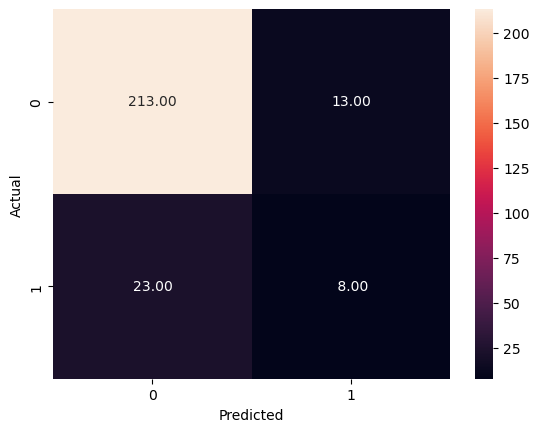

In [260]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='5.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [262]:
scores=[]
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    preds = knn.predict(X_test)
    sc = f1_score(preds, Y_test)
    scores.append(sc)

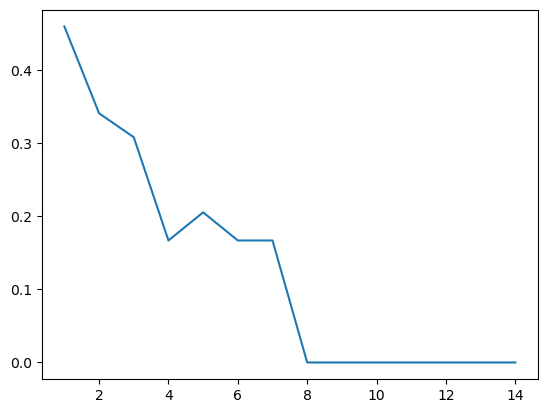

In [264]:
plt.plot(np.arange(1,15), scores)
plt.show()

In [268]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       226
           1       0.47      0.45      0.46        31

    accuracy                           0.87       257
   macro avg       0.70      0.69      0.69       257
weighted avg       0.87      0.87      0.87       257



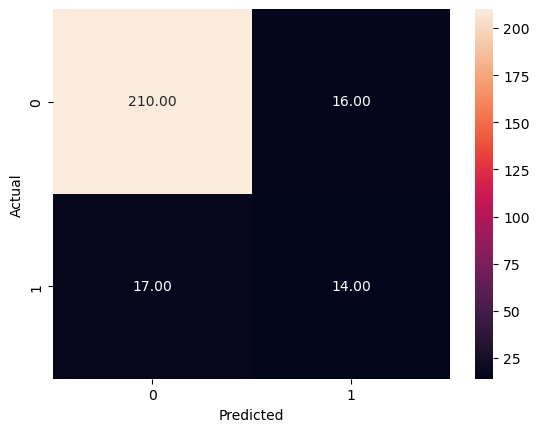

In [274]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='5.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()